# Task 2: Predicting customer buying behaviour
## 2. Exploratory Data Analysis (EDA)

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [2]:
cat = pd.read_pickle("cat_cleaning.pickle")
num = pd.read_pickle("num_cleaning.pickle")

## EDA CATEGORICAL

### Statistical analysis

In [3]:
cat.head()

,sales_channel,trip_type,flight_day,route,booking_origin
0,Internet,RoundTrip,Sat,OTHERS,New Zealand
1,Internet,RoundTrip,Sat,OTHERS,New Zealand
2,Internet,RoundTrip,Wed,OTHERS,India
3,Internet,RoundTrip,Sat,OTHERS,New Zealand
4,Internet,RoundTrip,Wed,OTHERS,India


In [4]:
def frequencies_cat(df_cat):
    result = df_cat.apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Value',0: "Frequency"})\
                .sort_values(by = ['Variable','Frequency'])
    return(result)

In [5]:
frequencies_cat(cat)

,Variable,Value,Frequency
73,booking_origin,Philippines,0.005377
65,booking_origin,Hong Kong,0.005966
69,booking_origin,Macau,0.006108
79,booking_origin,Vietnam,0.007833
78,booking_origin,United States,0.009192
...,...,...,...
1,sales_channel,Mobile,0.108845
0,sales_channel,Internet,0.891155
2,trip_type,CircleTrip,0.002354
3,trip_type,OneWay,0.007833


### Graphical analysis

In [6]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49281 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sales_channel   49281 non-null  object
 1   trip_type       49281 non-null  object
 2   flight_day      49281 non-null  object
 3   route           49281 non-null  object
 4   booking_origin  49281 non-null  object
dtypes: object(5)
memory usage: 2.3+ MB


In [7]:
def plots_eda_categorical(cat):
    #Compute how many rows we'll need
    from math import ceil
    nrows = ceil(cat.shape[1]/2)

    #Define the figure
    f, ax = plt.subplots(nrows = nrows, ncols = 2, figsize=(16, nrows*6))

    #Flatten the axes so we can iterate through all of them in a 1D-array format
    ax = ax.flat

    #Add each plot in a for loop
    for i,variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[i])
        ax[i].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[i].tick_params(labelsize = 12)

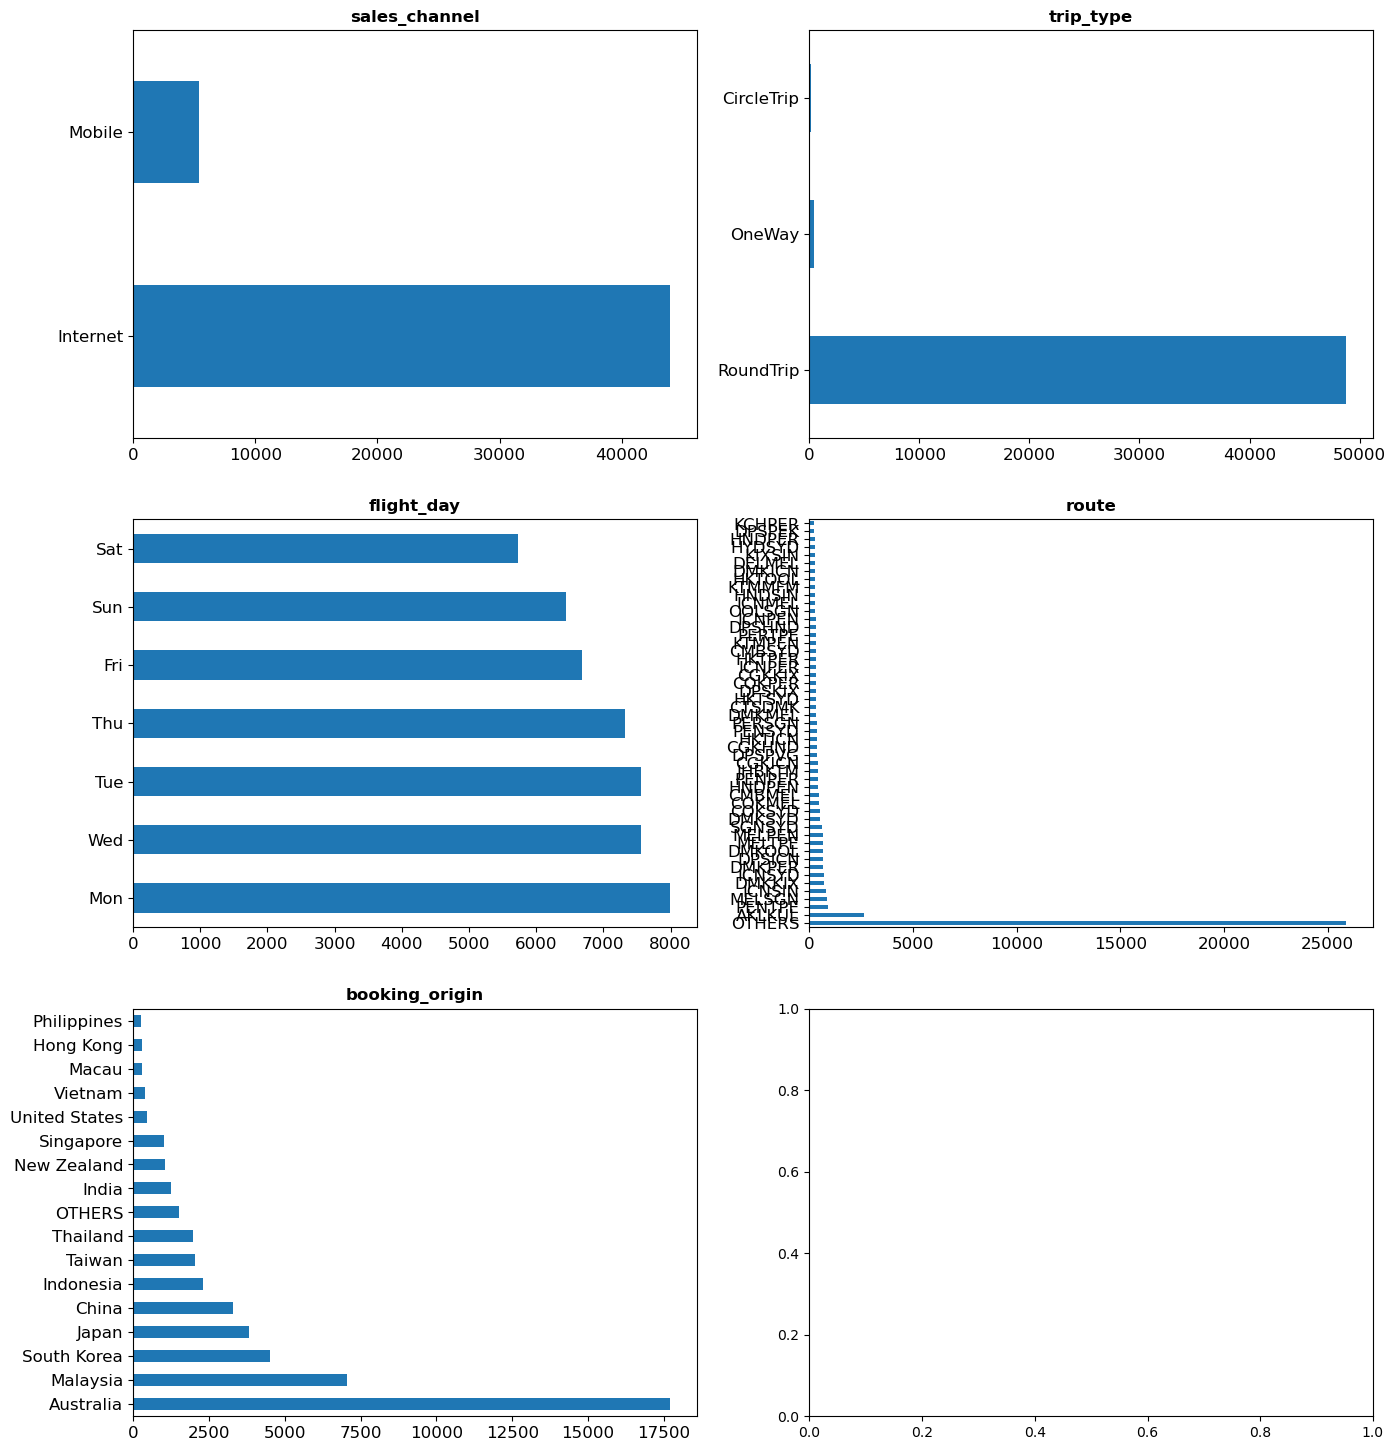

In [8]:
plots_eda_categorical(cat)

## EDA NUMERICAL

### Statistical analysis

In [9]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,49281.0,1.590187,1.016538,1.00,1.00,1.00,2.00,9.0
purchase_lead,49281.0,84.428766,89.265791,0.00,21.00,51.00,115.00,390.0
length_of_stay,49281.0,22.242812,27.701606,0.00,5.00,17.00,28.00,167.0
flight_hour,49281.0,9.070676,5.413099,0.00,5.00,9.00,13.00,23.0
wants_extra_baggage,49281.0,0.668229,0.470854,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,49281.0,0.295631,0.456331,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,49281.0,0.426635,0.494593,0.00,0.00,0.00,1.00,1.0
flight_duration,49281.0,7.279974,1.496390,4.67,5.62,7.57,8.83,9.5
booking_complete,49281.0,0.149977,0.357052,0.00,0.00,0.00,0.00,1.0


### Graphical analysis

In [10]:
def plots_eda_numerical(num):

    from math import ceil
    nrows = ceil(num.shape[1] / 2)

    f, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(16, nrows*6))

    ax = ax.flat

    for index,variable in enumerate(num):
        num[variable].plot.density(ax=ax[index])
        ax[index].set_title(variable, fontsize=12, fontweight="bold")
        ax[index].tick_params(labelsize=12)

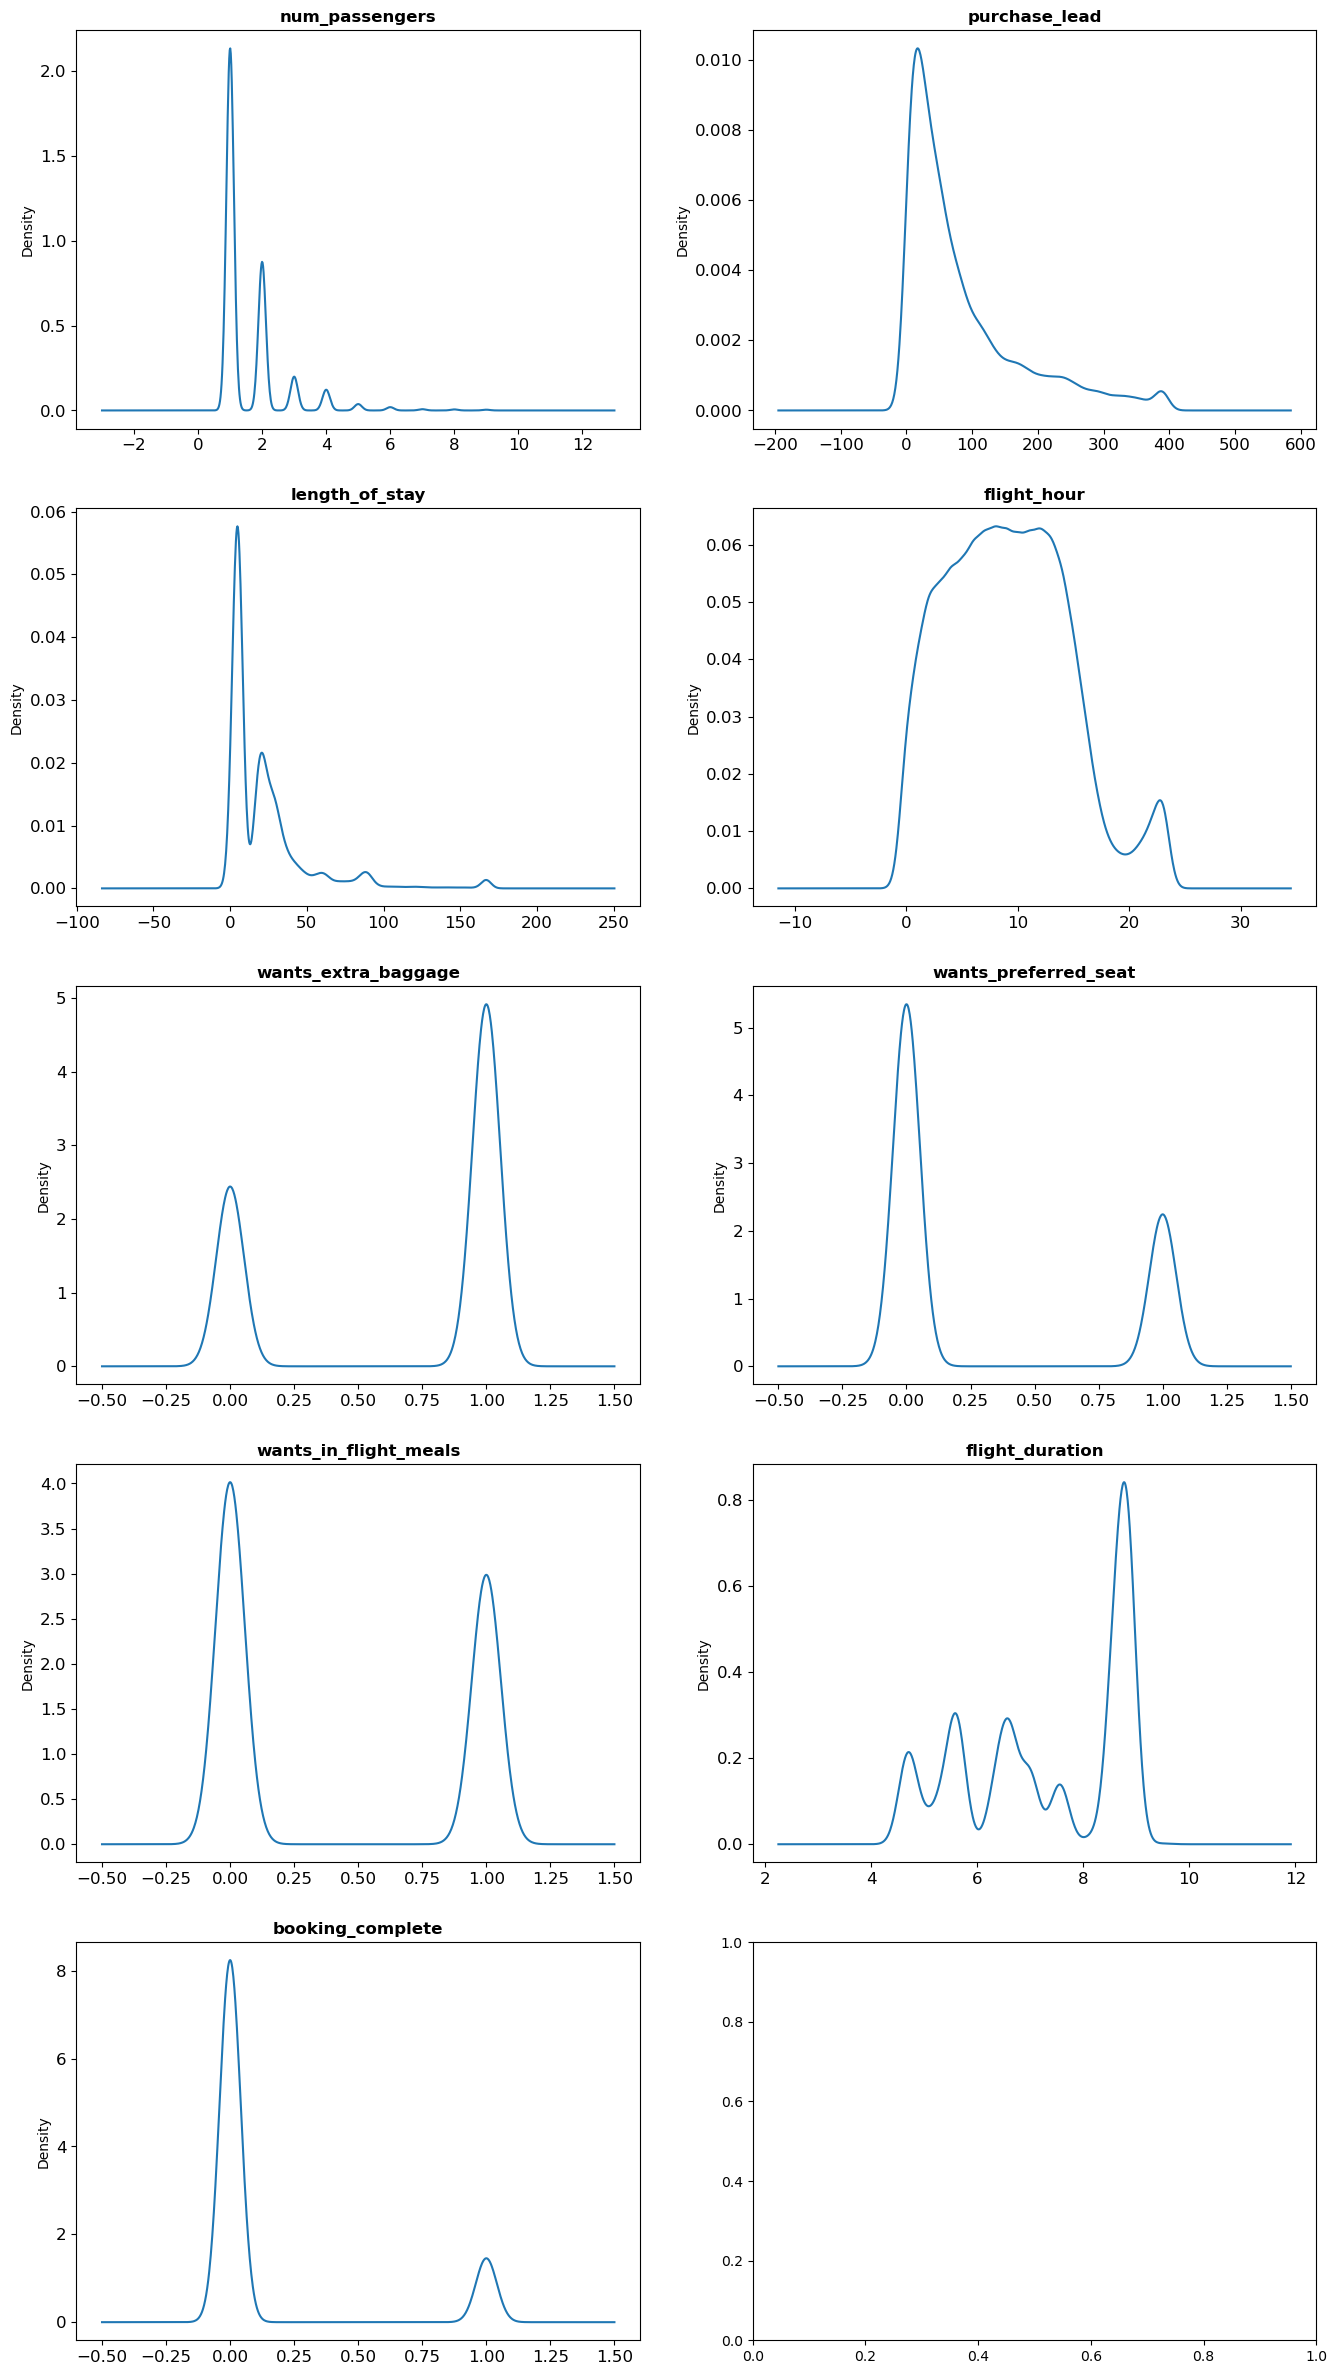

In [11]:
plots_eda_numerical(num)

Conclusions:

- Most flights are searched from Australia and Malaysia.
- Most trips (round trips) are likely to include 1 or 2 passengers in the flight, with a short length of stay.

Further insights could be worked out if this was a discovery project. Then, for the sake of the length of this project, this part is going to be avoided. 

Save the data in .pickle format to proceed to the next step (data transformation).

In [12]:
pd.to_pickle(cat, "cat_eda.pickle")
pd.to_pickle(num, "num_eda.pickle")